In [1]:
%%bash
ls

Inicio pruebas trix.ipynb
Tecnicos.py
__pycache__
periodo10.csv
periodo3.csv
periodo30.csv
periodo5.csv
periodo60.csv
periodo7.csv


In [1]:
import time
from Tecnicos import Tecnichal_Analisis as tc
from Tecnicos import Back_Testing as BT
import pandas as pd
from pandas import DataFrame, Series
import mpl_finance as finance
import matplotlib.pylab as plt
import numpy as np
import os

In [2]:
df=pd.read_csv("periodo3.csv",header=[0,1],index_col=[0])
df.index = pd.to_datetime(df.index)
df=df.sort_index()

In [3]:
cosa=BT.Inicializar_resumen_TRIX_2(df,period=5,period_mid=5,resample="1W")
resumen=BT.Filtro_Compra_Venta(cosa)
cum=BT.Obtener_resumen_estrategia(resumen)

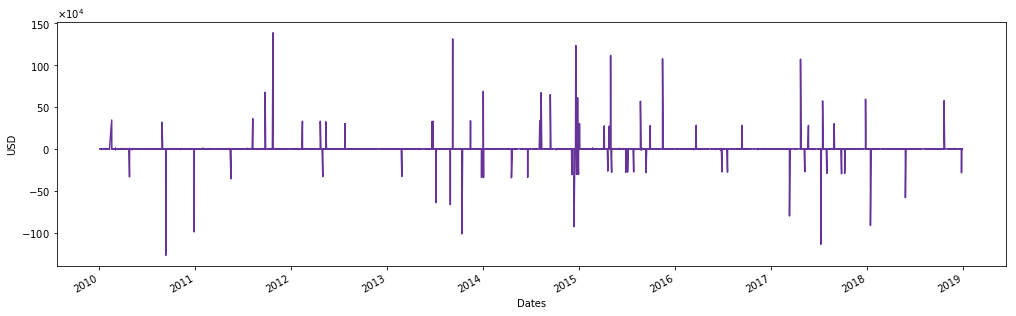

In [9]:
BT.Plot_Resumen_estrategia(cum,plot_cumulative=False,plot_rounds=True)

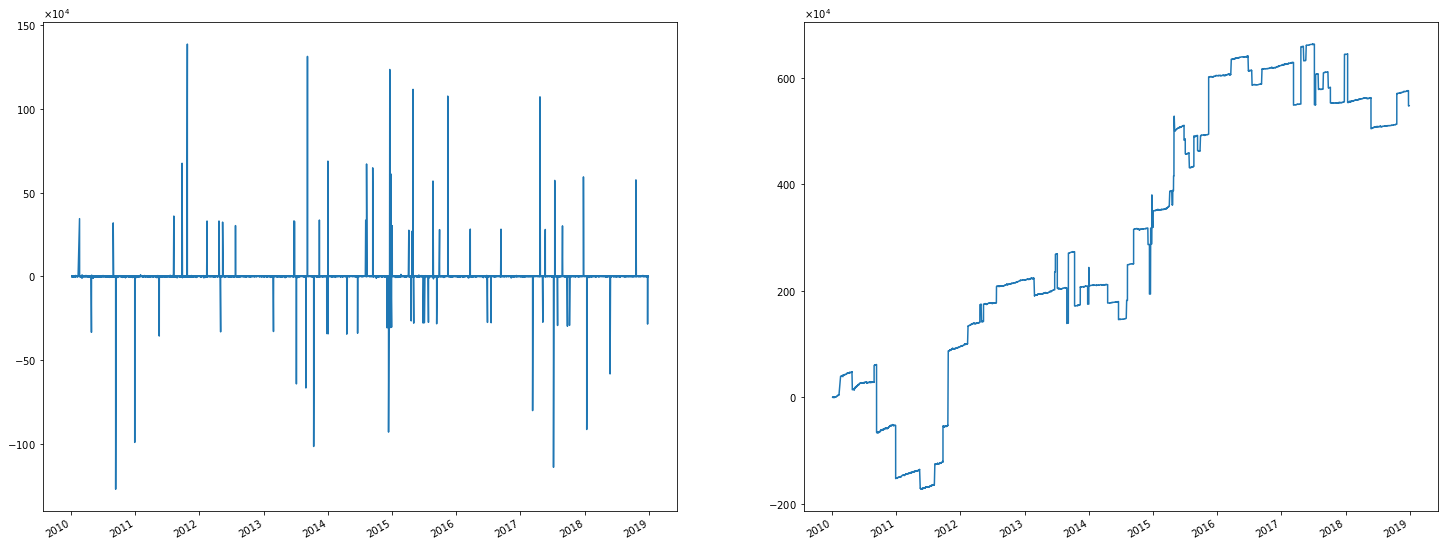

In [29]:
fig=plt.figure(figsize=(25,10))
plt.subplot(121)
cum.Position.plot()
plt.ticklabel_format(axis="y",style="sci",scilimits=(4,4),useMathText=True)
plt.subplot(122)
cum.Cumulative.plot()
plt.ticklabel_format(axis="y",style="sci",scilimits=(4,4),useMathText=True)
plt.show()

Text(0, 0.5, 'USD')

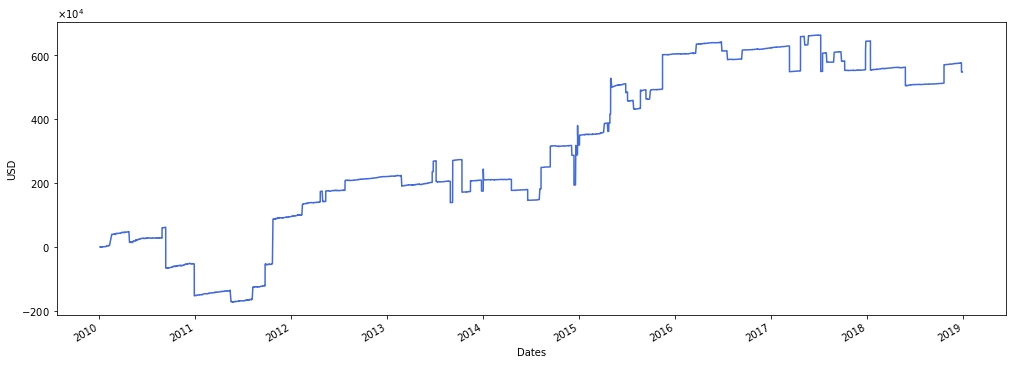

In [27]:
cum.Cumulative.plot(figsize=(17,6),color="royalblue",title)
plt.ticklabel_format(axis="y",style="sci",scilimits=(4,4),useMathText=True)
plt.xlabel("Dates")
plt.ylabel("USD")

In [ ]:
b=resumen.loc[resumen.Cumulative==0].index.tolist()
aux=0
cerrar_posicion=[]
fechas_ronda=[]
for i in b:
    cerrar_posicion.append((resumen["Precio"]*resumen["Total"]).loc[aux:i+1].sum()*1000)
    fechas_ronda.append(resumen["Fecha Hora"].iloc[i])
    aux=i+1

In [ ]:
plt.plot(resumen.Cumulative.values)
plt.axhline(y=-1000)
plt.axhline(y=1000)

In [ ]:
b=resumen.loc[resumen.Cumulative==0].index.tolist()
aux=0
cerrar_posicion=[]
fechas_ronda=[]
for i in b:
    cerrar_posicion.append((resumen["Precio"]*resumen["Total"]).loc[aux:i+1].sum()*1000)
    fechas_ronda.append(resumen["Fecha Hora"].iloc[i])
    aux=i+1
cum_sum=np.cumsum(cerrar_posicion)

In [ ]:
fig=plt.figure(figsize=(17,7))
plt.subplot(121)
plt.bar(range(len(cerrar_posicion)),cerrar_posicion,color="rebeccapurple")
plt.ticklabel_format(axis="y",style="sci",scilimits=(3,3),useMathText=True)
plt.title("Resultados por ronda")
a=np.arange(0,len(cerrar_posicion),int(len(cerrar_posicion)*0.15))
fechas_plot=[str(fechas_ronda[i])[:-9] for i in a]
plt.xticks(a,fechas_plot,rotation=45)
plt.subplot(122)
plt.plot(cum_sum,color="royalblue")
#plt.scatter(range(len(cum_sum)),cum_sum,color="maroon")
plt.ticklabel_format(axis="y",style="sci",scilimits=(3,3),useMathText=True)
plt.title("Acomulado por ronda")
plt.xticks(a,fechas_plot,rotation=45)
plt.show()

In [ ]:
resumen.set_index("Fecha Hora",inplace=True)

In [ ]:
rounds=resumen.reset_index().loc[resumen.reset_index()["Cumulative"]==0].index.tolist()

In [ ]:
rounds=resumen.reset_index().loc[resumen.reset_index()["Cumulative"]==0].index.tolist()
aux=0
close_position=[]
dates_round=[]
for i in rounds:
    close_position.append((resumen.iloc[aux:i+1]["Precio"]*resumen.iloc[aux:i+1]["Total"]).sum()*1000)
    dates_round.append(resumen.iloc[aux:i+1].index[-1])
    aux=i+1

In [ ]:
data={"Position":pd.Series(close_position,index=dates_round),"Cumulative":pd.Series(np.cumsum(close_position),index=dates_round)}

In [ ]:
data=pd.DataFrame(data=data)

In [ ]:
data.Cumulative.plot()

In [12]:
uno_c=False
dos_c=True

In [13]:
if uno_c and dos_c:
    print("las dos")
elif uno_c and not dos_c:
    print("solo la uno")
elif dos_c and not uno_c:
    print("solo dos")

solo dos


In [ ]:
resumen.index[0]